In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
df = pd.read_csv("C:/users/humna/Downloads/cars_data_clean.csv")
df.head()

,usedCarSkuId,loc,myear,body,transmission,fuel,km,ip,images,imgCount,...,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,7111bf25-97af-47f9-867b-40879190d800,gomti nagar,2016,hatchback,manual,cng,69162.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,c309efc1-efaf-4f82-81ad-dcb38eb36665,borivali west,2015,hatchback,manual,cng,45864.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,Gasoline Port Injection,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
2,7609f710-0c97-4f00-9a47-9b9284b62d3a,jasola,2015,sedan,manual,cng,81506.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,...,NaN,NaN,NaN,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN
3,278b76e3-5539-4a5e-ae3e-353a2e3b6d7d,jasola,2013,hatchback,manual,cng,115893.0,0,[{'img': ''}],0,...,Multi-Point Fuel Injection,NaN,13.0,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN
4,b1eab99b-a606-48dd-a75b-57feb8a9ad92,mumbai g.p.o.,2022,muv,manual,cng,18900.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,6,...,NaN,12.0,NaN,NaN,86.63,5500.0,121.5,4200.0,NaN,NaN


In [6]:
beta_1,beta_0=np.polyfit(df['km'],df['listed_price'],1)
beta_1

-2.1789542659951375

In [7]:
beta_0

935973.8135779747

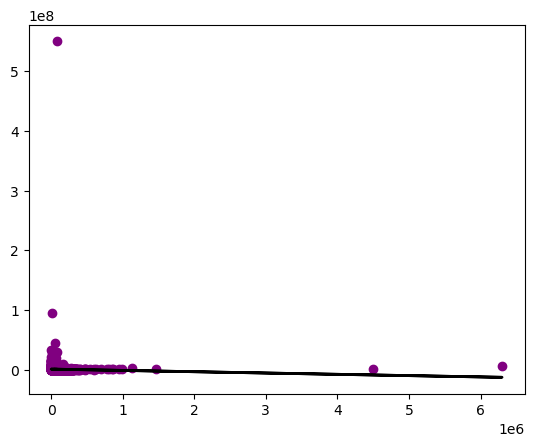

In [14]:
plt.scatter(df['km'],df['listed_price'],color="purple")
plt.plot(df['km'], beta_0 + beta_1*df['km'], color="black", linestyle="-", linewidth=2) 

In [8]:
df['Predicted_Listed_Price']=beta_0+beta_1*df['km']
df['Error']=df['listed_price']-df['Predicted_Listed_Price']
df['Relative_Error']=df['Error']/df['listed_price']
df['Absolute_Relative_Error'] = df['Relative_Error'].abs()
MAPE=df['Absolute_Relative_Error'].mean()*100


In [9]:
MAPE

120.52233264444976

In [10]:
ssr = ((df['listed_price'] - df['Predicted_Listed_Price']) ** 2).sum()
ssr

3.4952994252805395e+17

In [11]:
sst = ((df['listed_price'] - df['listed_price'].mean()) ** 2).sum()
sst

3.501437387048216e+17

In [12]:
R2=1-(ssr/sst)
R2

0.0017529834434226732

In [15]:
n = len(df)
p = 1
adjusted_r_squared = 1 - (1 - R2) * (n - 1) / (n - p - 1)
adjusted_r_squared

0.0017265824750124503

In [21]:
df['Predicted_Listed_Price'] = beta_0 + beta_1 * df['km']


In [23]:
average_km_first_owner = 69162
predicted_price_first_owner = beta_0 + beta_1 * average_km_first_owner
predicted_price_first_owner



785272.9786332189

In [25]:
Y=df['listed_price']
X=df['km']

In [26]:
X=sm.add_constant(X)
model=sm.OLS(Y,X)
model_result=model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           listed_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     66.40
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           3.80e-16
Time:                        22:54:47   Log-Likelihood:            -6.1811e+05
No. Observations:               37813   AIC:                         1.236e+06
Df Residuals:                   37811   BIC:                         1.236e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.36e+05   2.29e+04     40.928      0.000    8.91e+05    9.81e+05
km            -2.1790      0.267     -8.149      0.000      -2.703      -1.655
==============================================================================
Omnibus:                   172464.231   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1251994540228.492
Skew:                         157.049   Prob(JB):                         0.00
Kurtosis:                   28190.679   Cond. No.                     1.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
beta_0=936000
beta_1=-2.1790

In [28]:
Y_pred=beta_0+beta_1*69162
Y_pred

785296.002